In [45]:
# load useful packages
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
# add seaborn viz
sns.set()

import plotly

import plotly.graph_objects as go

In [46]:
colorscheme = ['cornflowerblue', 'lightcoral','bisque', 'plum', 'palegreen','darkgray']
# sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [3]:
validators = pd.read_csv('validator.csv',encoding='cp1252')
validators.head()

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials
0,1,0,NaN,0,0,9223372036854775807,9223372036854775807,31751489943,31000000000,476737,0x8fcf28896a85e5e76ee9e508438e23e7253da1a23a65...,NaN,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...
1,2,1,NaN,0,0,9223372036854775807,9223372036854775807,94015709868,32000000000,0,0x873e73ee8b3e4fcf1d2fb0f1036ba996ac9910b5b348...,NaN,0x00b8cdcf79ba7e74300a07e9d8f8121dd0d8dd11dcfd...
2,3,2,NaN,0,0,9223372036854775807,9223372036854775807,30091773156,30000000000,0,0x8c2f535d3bec65f95cb4ba455566e4ec3de8da5c13a6...,NaN,0x006490500934b8b1876401dc09b7904d04c0897a9a28...
3,4,3,carlbeek | Lighthouse ??,0,0,9223372036854775807,9223372036854775807,31445974991,31000000000,476758,0xa8d9b5b62cc31149ad58a281a2293cd3f4dca11855c9...,NaN,0x002f5bc32089b840a516c800c3c597bff24536c6c7c9...
4,5,4,NaN,0,0,5223,5479,31403584679,31000000000,0,0xadf943279435f1c194add1cdfe99e3fde5284d0451a6...,NaN,0x0010361af430aa7ab4a9567eaaca50ec5e02315ca151...


Text(0, 0.5, 'validators')

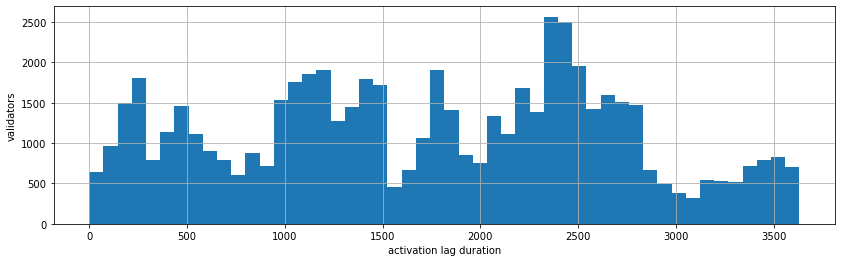

In [5]:
#add activation lag
validators['activation_lag'] = validators['activationepoch']  - validators['activationeligibilityepoch']
#filter out entires at 0 and sort
validators = validators.loc[validators['activationeligibilityepoch'] > 0]
validators.sort_values(by=['activation_lag'], ascending=False)
#histogram
#validators
validators['activation_lag'].hist(bins=50, figsize=(14,4))
pl.xlabel('activation lag duration')
pl.ylabel('validators')

Text(0, 0.5, 'average_activation_lag_in_epochs')

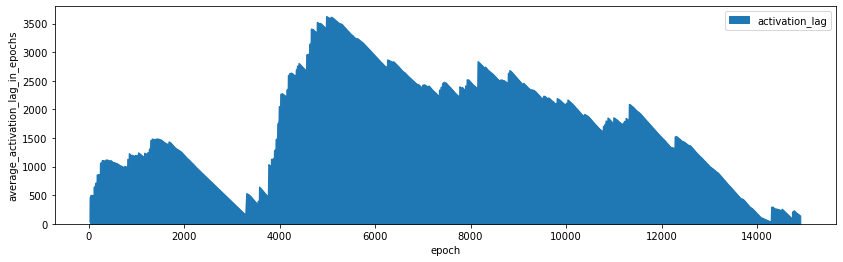

In [6]:
# pivot for avg activation lag
activation_lag_series = pd.pivot_table(validators, index=["activationeligibilityepoch"], values=["activation_lag"], aggfunc='mean')
activation_lag_series.index.name = None
activation_lag_series['epoch'] = activation_lag_series.index
#filter out entires at 0 and sort
activation_lag_series = activation_lag_series.loc[activation_lag_series['activation_lag'] > 0]
# plot time series
activation_lag_series.plot(kind='area',x='epoch', y='activation_lag', figsize=(14,4))
pl.xlabel("epoch")
pl.ylabel("average_activation_lag_in_epochs")

In [10]:
validators.head()

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials,activation_lag,exit_lag
20084,20085,20084,NaN,32,38,2077,2333,31886697333,32000000000,0,0xa0d46f3e977da3c53d46dcff9a4f7e6b4895cf9fb66e...,NaN,0x00f51a03211451f1cbb0a6b609cfefdb777b837e3344...,6,256
20092,20093,20092,NaN,32,40,2077,2333,31886818485,32000000000,0,0xb399c55dbbf12e797d162e0e7c11d86aa69f4b85c6b4...,NaN,0x00e7f44e471edfddd89561d178292f87d890ac65214b...,8,256
20093,20094,20093,NaN,32,40,2077,2333,31886818485,32000000000,0,0x8b18cf17f1a4b864fdb16360b207d5d3f5a04f188649...,NaN,0x00887bb4ca8e42b366e7960634dad160eb526590cd49...,8,256
20094,20095,20094,NaN,32,40,2077,2333,31886818485,32000000000,0,0x986117db6e7731541fe367fe9c9acf5c281c5bec6d92...,NaN,0x0058c293917edf5cd7bfb1ecebc1bdd60aaf410c3af4...,8,256
20096,20097,20096,NaN,32,41,2078,2334,31886827887,32000000000,0,0xaacad7c679b7aa6f3bfed3c288307114f8a9b400b053...,NaN,0x00c467081ecca75c17f2d084b4672b63c4b692a0806f...,9,256


In [13]:
df_identified_validators = pd.read_csv('new_validators_by_indentifier_master.csv')
df_identified_validators.head()

,validatorindex,name,identifier,eth1_deposit_addr,with_key_match,client_identifier,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials,withdrawa_credentials_updated
0,3,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1027,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1031,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1032,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1033,NaN,NaN,NaN,NaN,lighthouse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
validators_with_client = validators.merge(df_identified_validators[['validatorindex', 'client_identifier']], on='validatorindex', how='left')

In [37]:
validators_with_client.fillna('Unknown', inplace=True)
validators_with_client.head()

,id,validatorindex,name,activationeligibilityepoch,activationepoch,exitepoch,withdrawableepoch,balance,effectivebalance,lastattestationslot,pubkey,slashed,withdrawalcredentials,activation_lag,exit_lag,client_identifier
0,20085,20084,Unknown,32,38,2077,2333,31886697333,32000000000,0,0xa0d46f3e977da3c53d46dcff9a4f7e6b4895cf9fb66e...,Unknown,0x00f51a03211451f1cbb0a6b609cfefdb777b837e3344...,6,256,Unknown
1,20093,20092,Unknown,32,40,2077,2333,31886818485,32000000000,0,0xb399c55dbbf12e797d162e0e7c11d86aa69f4b85c6b4...,Unknown,0x00e7f44e471edfddd89561d178292f87d890ac65214b...,8,256,Unknown
2,20094,20093,Unknown,32,40,2077,2333,31886818485,32000000000,0,0x8b18cf17f1a4b864fdb16360b207d5d3f5a04f188649...,Unknown,0x00887bb4ca8e42b366e7960634dad160eb526590cd49...,8,256,Unknown
3,20095,20094,Unknown,32,40,2077,2333,31886818485,32000000000,0,0x986117db6e7731541fe367fe9c9acf5c281c5bec6d92...,Unknown,0x0058c293917edf5cd7bfb1ecebc1bdd60aaf410c3af4...,8,256,Unknown
4,20097,20096,Unknown,32,41,2078,2334,31886827887,32000000000,0,0xaacad7c679b7aa6f3bfed3c288307114f8a9b400b053...,Unknown,0x00c467081ecca75c17f2d084b4672b63c4b692a0806f...,9,256,Unknown


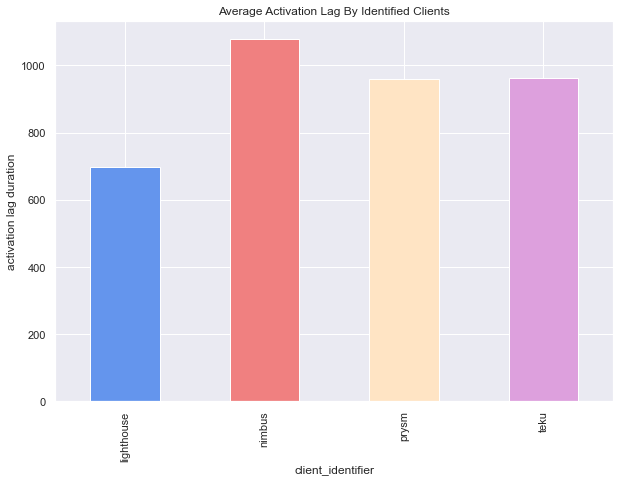

In [54]:
validators_with_client_no_unknown = validators_with_client[(validators_with_client['client_identifier']!='unknown') & (validators_with_client['client_identifier']!='Unknown')]
validators_with_client_no_unknown.groupby('client_identifier')['activation_lag'].mean().plot(kind='bar', title='Average Activation Lag By Identified Clients', ylabel='activation lag duration', color=colorscheme, figsize=[10,7])

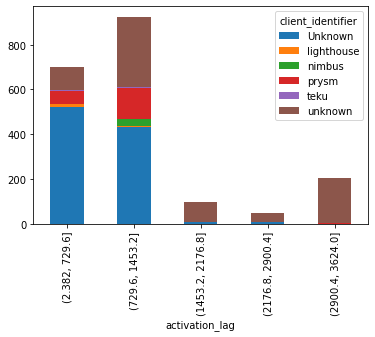

In [35]:
# #filter out entires at 0 and sort
# validators_with_client = validators.loc[validators_with_client['activationeligibilityepoch'] > 0]
# validators_with_client.sort_values(by=['activation_lag'], ascending=False)
#histogram
#validators
# validators_with_client[['activation_lag', 'client_identifier']].hist(bins=50, figsize=(14,4), stacked=True)
# pl.xlabel('activation lag duration')
# pl.ylabel('validators')

validators_with_client_identified = validators[]

df = pd.crosstab(pd.cut(validators_with_client['activation_lag'], 5), validators_with_client['client_identifier'])
df.plot.bar(stacked=True)


## Exit Lag

<ipython-input-7-89e77cc53b09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validators['exit_lag'] = validators['withdrawableepoch']  - validators['exitepoch']


Text(0, 0.5, 'validators')

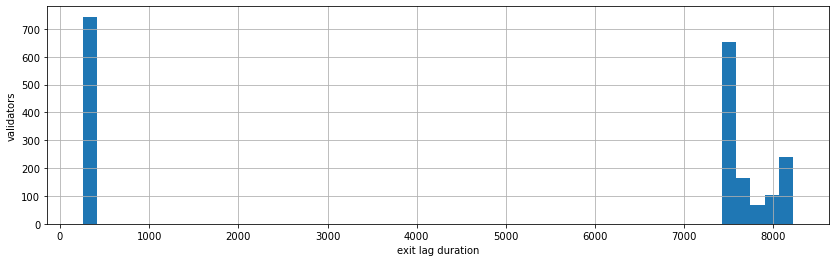

In [7]:
#add exit lag
validators['exit_lag'] = validators['withdrawableepoch']  - validators['exitepoch']
#filter out entires at 0 and sort
validators = validators.loc[validators['exit_lag'] > 10]
validators.sort_values(by=['exit_lag'], ascending=False)
#histogram
#validators
validators['exit_lag'].hist(bins=50, figsize=(14,4))
pl.xlabel('exit lag duration')
pl.ylabel('validators')

Text(0, 0.5, 'average_exit_lag_in_epochs')

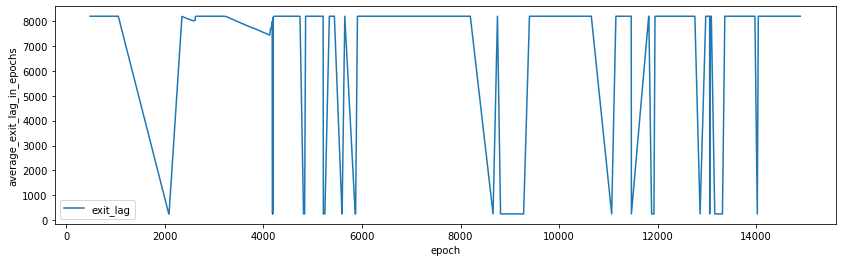

In [8]:
# pivot for avg exit lag
exit_lag_series = pd.pivot_table(validators, index=["exitepoch"], values=["exit_lag"], aggfunc='mean')
exit_lag_series.index.name = None
exit_lag_series['epoch'] = exit_lag_series.index
#filter out entires at 0 and sort
exit_lag_series = exit_lag_series.loc[exit_lag_series['exit_lag'] > 0]
# plot time series
exit_lag_series.plot(kind='line',x='epoch', y='exit_lag', figsize=(14,4))
pl.xlabel("epoch")
pl.ylabel("average_exit_lag_in_epochs")